In [35]:
import os

from skimage import io
from skimage import color
from skimage import measure, morphology
from skimage import util

from scipy import signal

import matplotlib.pyplot as plt

import numpy as np

In [47]:
data_path = "C:/Users/Sadek/Documents/GitHub/Project/offline-signature/data"

# Join data_path and the image file name to create a full image path
image_path = os.path.join(data_path + "/input/doc1.jpg")

# Read the image from the specified path
image = io.imread(image_path)

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Apply median filtering with a kernel size of 11x11 to reduce noise in the image
bg = signal.medfilt2d(image_gray, (11,11))

# Create a binary mask by subtracting a small value (0.01) from the median-filtered image
mask = image_gray < bg - 0.01

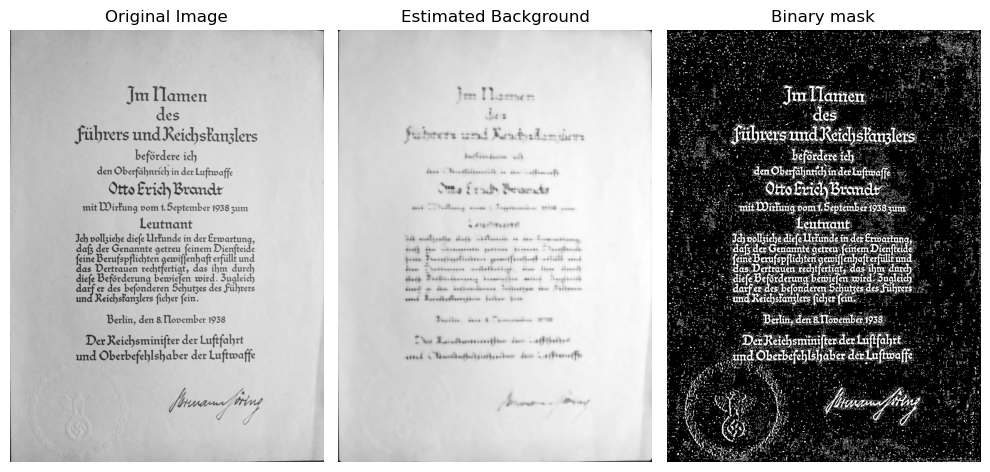

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_axis_off()

ax[1].imshow(bg, cmap='gray')
ax[1].set_title('Estimated Background')
ax[1].set_axis_off()

ax[2].imshow(mask, cmap='gray')
ax[2].set_title('Binary mask')
ax[2].set_axis_off()

plt.tight_layout()
plt.show()

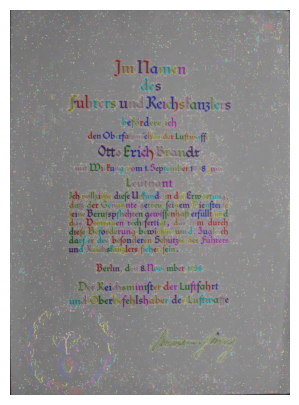

In [49]:
mask_labels = measure.label(mask, background=0)
image_label_overlay = color.label2rgb(mask_labels, image=image)
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the connected components (for debugging)
plt.imshow(image_label_overlay, cmap="gray")
plt.axis('off')
plt.show()

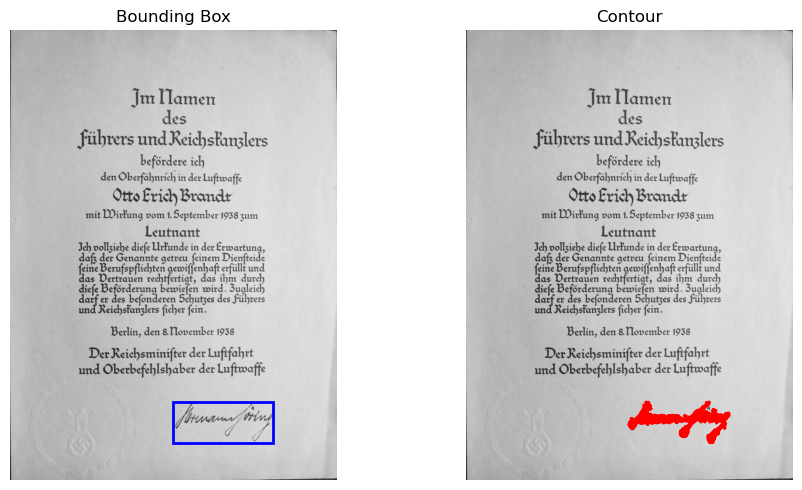

In [39]:
# Get the properties of each labeled region, including its area and centroid
regions = measure.regionprops(mask_labels)

# Find the largest connected component by area
largest_region = max(regions, key=lambda x: x.area)

# Extract the bounding box coordinates of the largest component
minr, minc, maxr, maxc = largest_region.bbox

# Get the coordinates of the largest component's contour
contours = measure.find_contours(mask_labels == largest_region.label, 0.5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image_gray, cmap='gray')
ax[0].add_patch(plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                            fill=False, edgecolor='blue', linewidth=2))
ax[0].set_title('Bounding Box')
ax[0].set_axis_off()

ax[1].imshow(image_gray, cmap='gray')
for contour in contours:
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2, c='red')
ax[1].set_title('Contour')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

In [40]:
def display_image(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title("Shape: {}".format(image.shape))
    plt.show()

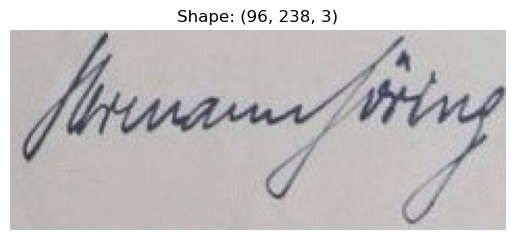

In [41]:
# Find the bounding box of the signature
x1, y1, x2, y2 = largest_region.bbox

# Crop the image
target = image[x1:x2, y1:y2, :]

# Remove single-dimensional entries from the shape of the array
target = target.squeeze()

display_image(target)

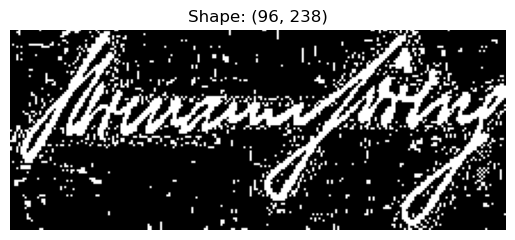

In [42]:
target_mask = mask[x1:x2, y1:y2]
display_image(target_mask)

The parameters constant_parameter_1, constant_parameter_2, and constant_parameter_3 are used to calculate the threshold value a4_small_size_outliar_constant which is used to remove small size connected pixel outliers.

the_biggest_component: 3221
average: 3221.0
a4_small_size_outliar_constant: 32310.000000000004
a4_big_size_outliar_constant: 581580.0000000001


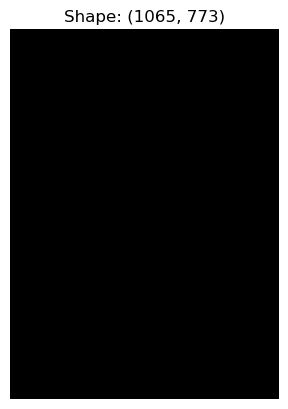

In [34]:
# the parameters are used to remove small size connected pixels outliar 
constant_parameter_1 = 10
constant_parameter_2 = 100
constant_parameter_3 = 100

# the parameter is used to remove big size connected pixels outliar
constant_parameter_4 = 18

the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in measure.regionprops(mask_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    # print region.area # (for debugging)
    # take regions with large enough areas
    if (region.area >= 250):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))


# experimental-based ratio calculation, modify it for your cases
# a4_small_size_outliar_constant is used as a threshold value to remove connected outliar connected pixels
# are smaller than a4_small_size_outliar_constant for A4 size scanned documents
a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3
print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))
# experimental-based ratio calculation, modify it for your cases
# a4_big_size_outliar_constant is used as a threshold value to remove outliar connected pixels
# are bigger than a4_big_size_outliar_constant for A4 size scanned documents
a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))
# remove the connected pixels are smaller than a4_small_size_outliar_constant
pre_version = morphology.remove_small_objects(mask_labels, a4_small_size_outliar_constant)
display_image(pre_version)

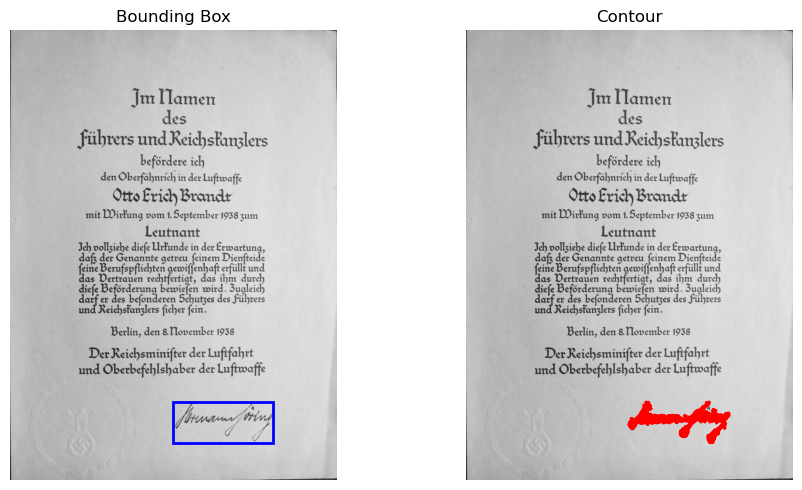

In [44]:
# Apply connected-component labeling to the binary image
mask_labels = measure.label(pre_version, background=0)

#Get the properties of each labeled region, including its area and centroid
regions = measure.regionprops(mask_labels)

# Find the largest connected component by area
largest_region = max(regions, key=lambda x: x.area)

# Extract the bounding box coordinates of the largest component
minr, minc, maxr, maxc = largest_region.bbox

# Get the coordinates of the largest component's contour
contours = measure.find_contours(mask_labels == largest_region.label, 0.5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image_gray, cmap='gray')
ax[0].add_patch(plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                            fill=False, edgecolor='blue', linewidth=2))
ax[0].set_title('Bounding Box')
ax[0].set_axis_off()

ax[1].imshow(image_gray, cmap='gray')
for contour in contours:
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2, c='red')
ax[1].set_title('Contour')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

Largest component area: 3221
Average area: 78.30098039215686
Small size outlier threshold: 883.0098039215686
Big size outlier threshold: 15894.176470588234


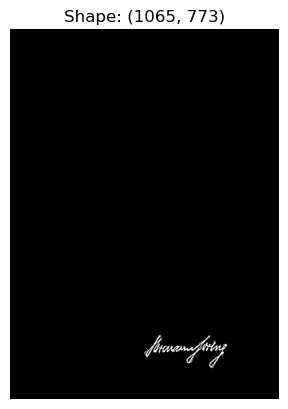

In [50]:
# Define the parameters used to remove small size connected pixel outliers
SMALL_SIZE_OUTLIER_THRESHOLD = 10
SMALL_SIZE_OUTLIER_CONSTANT = 100
SMALL_SIZE_OUTLIER_OFFSET = 100

# Define the parameter used to remove big size connected pixel outliers
BIG_SIZE_OUTLIER_THRESHOLD = 18

# Initialize variables
largest_component_area = 0
total_area = 0
num_large_regions = 0
average_area = 0.0

# Iterate through the regions in the mask
for region in measure.regionprops(mask_labels):
    # Only consider regions with areas greater than SMALL_SIZE_OUTLIER_THRESHOLD
    if (region.area > SMALL_SIZE_OUTLIER_THRESHOLD):
        total_area += region.area
        num_large_regions += 1
        # Check if this region is the largest found so far
        if (region.area > largest_component_area):
            largest_component_area = region.area

# Calculate the average area of the large regions
if num_large_regions > 0:
    average_area = total_area / num_large_regions

# Print the results
print("Largest component area: " + str(largest_component_area))
print("Average area: " + str(average_area))

# Calculate the threshold values for removing outliers
small_size_outlier_threshold = ((average_area / SMALL_SIZE_OUTLIER_THRESHOLD) * SMALL_SIZE_OUTLIER_CONSTANT) + SMALL_SIZE_OUTLIER_OFFSET
big_size_outlier_threshold = small_size_outlier_threshold * BIG_SIZE_OUTLIER_THRESHOLD
print("Small size outlier threshold: " + str(small_size_outlier_threshold))
print("Big size outlier threshold: " + str(big_size_outlier_threshold))

# Remove small size outliers and display the resulting image
pre_version = morphology.remove_small_objects(mask_labels, small_size_outlier_threshold)
display_image(pre_version)

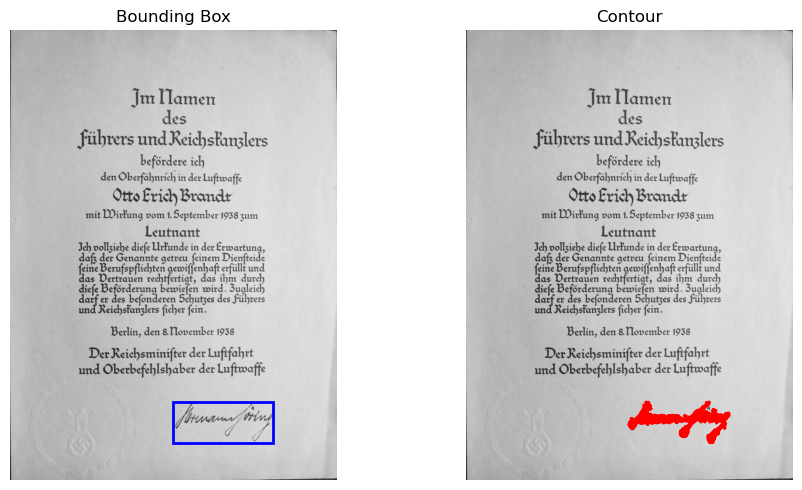

In [51]:
# Apply connected-component labeling to the binary image
mask_labels = measure.label(pre_version, background=0)

#Get the properties of each labeled region, including its area and centroid
regions = measure.regionprops(mask_labels)

# Find the largest connected component by area
largest_region = max(regions, key=lambda x: x.area)

# Extract the bounding box coordinates of the largest component
minr, minc, maxr, maxc = largest_region.bbox

# Get the coordinates of the largest component's contour
contours = measure.find_contours(mask_labels == largest_region.label, 0.5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image_gray, cmap='gray')
ax[0].add_patch(plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                            fill=False, edgecolor='blue', linewidth=2))
ax[0].set_title('Bounding Box')
ax[0].set_axis_off()

ax[1].imshow(image_gray, cmap='gray')
for contour in contours:
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2, c='red')
ax[1].set_title('Contour')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()